In [1]:
import pandas as pd
import numpy as np
from scipy.stats import uniform
from scipy.stats import randint
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import warnings
from sklearn import metrics

In [2]:
data = pd.read_csv('Pt_nanoparticle_subset.csv', index_col=0)
data.head()

,N_total,N_bulk,N_surface,R_min,R_max,R_diff,R_avg,R_std,R_skew,R_kurt,...,q6q6_T8,q6q6_T9,q6q6_T10,q6q6_T11,q6q6_T12,Surf_defects_mol,Surf_micros_mol,Surf_facets_mol,Total_E,Formation_E
ID,,,,,,,,,,,,,,,,,,,,,
1,1732,1129,603,15.1180,18.9872,3.8692,17.2471,0.6262,-0.1372,0.1226,...,64,88,52,43,40,0.0000,121.5956,267.1222,-9237.3055,756.3345
2,1755,1150,605,15.3043,20.0506,4.7463,17.3469,0.6597,0.2938,0.3970,...,69,74,44,30,50,0.6383,117.4488,266.1747,-9335.3608,790.9892
3,4672,3456,1216,21.5357,27.5179,5.9822,24.5075,0.9193,-0.0729,0.1330,...,261,258,243,182,696,0.4796,84.8806,205.7275,-25287.5650,1669.8750
4,6823,5122,1701,23.3351,35.9820,12.6469,28.0471,1.9581,0.4768,0.2181,...,417,488,419,400,1730,0.6567,87.3462,189.9616,-37049.1710,2319.5390
5,10733,8349,2384,25.7149,40.8339,15.1190,32.7271,2.1220,-0.3342,0.2877,...,683,782,685,713,4006,0.6262,83.9156,163.6563,-58602.2500,3327.1600


In [3]:
X = data.iloc[:,:-5]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8)

In [4]:
# Create a Random Forest Regressor
rf_reg = RandomForestRegressor()
hps = dict(n_estimators=[50,100,150,200,250],min_samples_split=[2,3,4],min_samples_leaf=[1,2,3],max_features=["auto","sqrt","log2"])
reg = GridSearchCV(rf_reg, hps)
# Train the model using the training sets 
reg.fit(X_train, y_train)
y_pred = reg.predict(X_train)

# Model Evaluation
print(reg.best_params_)
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

# Predicting Test data with the model
y_test_pred = reg.predict(X_test)
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

{'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
R^2: 0.9996061875738679
Adjusted R^2: 0.9995858591996445
MAE: 14.734847363333333
MSE: 604.622483326248
RMSE: 24.589072437289047
R^2: 0.9978819821763905
Adjusted R^2: 0.9973626604984862
MAE: 34.98769304538463
MSE: 3266.296987235336
RMSE: 57.15152655209952


In [5]:
from sklearn.model_selection import SequenceSearchCV
# Create a Random Forest Regressor
rf_reg = RandomForestRegressor()
hps = dict(n_estimators=[50,100,150,200,250],min_samples_split=[2,3,4],min_samples_leaf=[1,2,3],max_features=["auto","sqrt","log2"])
reg = RandomizedSearchCV(rf_reg, hps, random_state=0, n_iter=50)
# Train the model using the training sets 
reg.fit(X_train, y_train)
y_pred = reg.predict(X_train)

# Model Evaluation
print(reg.best_params_)
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

# Predicting Test data with the model
y_test_pred = reg.predict(X_test)
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

{'n_estimators': 250, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
R^2: 0.9995984497012113
Adjusted R^2: 0.9995777219023871
MAE: 14.791800936682533
MSE: 612.9870681607362
RMSE: 24.758575648868337
R^2: 0.9965949374941803
Adjusted R^2: 0.9957600423605417
MAE: 39.71843260231062
MSE: 5371.489250744345
RMSE: 73.29044447091547


In [6]:
from sklearn.model_selection import SequenceSearchCV
# Create a Random Forest Regressor
rf_reg = RandomForestRegressor()
hps = dict(n_estimators=[50,100,150,200,250],min_samples_split=[2,3,4],min_samples_leaf=[1,2,3],max_features=["auto","sqrt","log2"])
reg = SequenceSearchCV(rf_reg, hps, random_state=0, n_iter=50)
# Train the model using the training sets 
reg.fit(X_train, y_train)
y_pred = reg.predict(X_train)

# Model Evaluation
print(reg.best_params_)
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

# Predicting Test data with the model
y_test_pred = reg.predict(X_test)
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

{'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
R^2: 0.9995469108007851
Adjusted R^2: 0.9995235225931333
MAE: 15.894072872399239
MSE: 691.6638355887644
RMSE: 26.299502573029102
R^2: 0.996773331052025
Adjusted R^2: 0.9959821766465119
MAE: 39.85305378472704
MSE: 5090.0732483281045
RMSE: 71.34474926950199


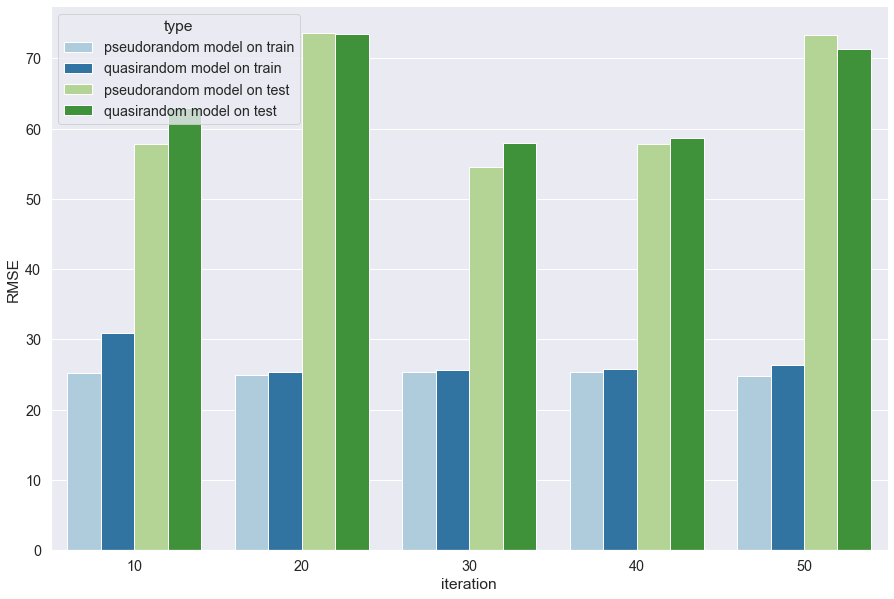

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame({
    'iteration': ['10','20','30','40','50'],
    'pseudorandom model on train': [25.2518,24.9742,25.3649,25.4119,24.7586],
    'quasirandom model on train': [30.9722,25.3821,25.6400,25.7800,26.2995],
    'pseudorandom model on test': [57.8019,73.6756,54.5195,57.7899,73.2904],
    'quasirandom model on test': [62.9973,73.5421,57.9015,58.6171,71.3447]
})
fig, ax1 = plt.subplots(figsize=(15, 10))
tidy = df.melt(id_vars='iteration').rename(columns=str.title)
tidy.columns = ['iteration', 'type', 'RMSE']
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(font_scale = 1.3)
sns.set_palette(sns.color_palette("Paired"))
sns.barplot(x='iteration', y='RMSE', hue='type', data=tidy, ax=ax1)
sns.despine(fig)
plt.savefig('hp_opt_all_list.png',bbox_inches='tight')

In [23]:
tidy.columns

Index(['iteration', 'RMSE', 'type'], dtype='object')

In [24]:
tidy

,iteration,RMSE,type
0,10,pseudorandom model on train,25.2518
1,20,pseudorandom model on train,24.9742
2,30,pseudorandom model on train,25.3649
3,40,pseudorandom model on train,25.4119
4,50,pseudorandom model on train,24.7586
5,10,quasirandom model on train,30.9722
6,20,quasirandom model on train,25.3821
7,30,quasirandom model on train,25.6400
8,40,quasirandom model on train,25.7800
9,50,quasirandom model on train,26.2995
